In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- Hyperparameter Tuning Results ---
Best Cross-Validation Accuracy: 0.9600
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

--- Test Set Evaluation ---
Test Accuracy: 0.9850

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200


Confusion Matrix:
[[ 82   2]
 [  1 115]]


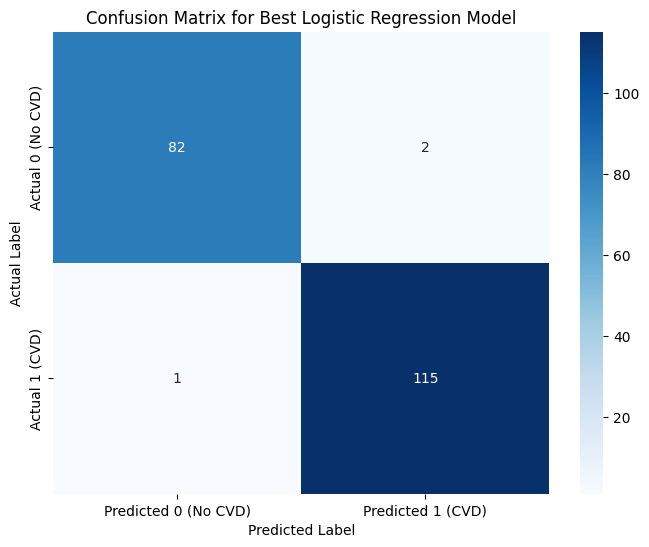

In [2]:
# Load Data 
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

# Drop 'patientid' and define features (X) and target (y)
X = df.drop(['patientid', 'target'], axis=1)
y = df['target']

#  Data Splitting
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Feature Scaling 
# Standardize features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Model and Parameter Grid for Hyperparameter Tuning 
logreg = LogisticRegression(random_state=42)

# Define parameters to search over (C is regularization strength)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # 'liblinear' supports both 'l1' and 'l2'
}

# 5. Grid Search for Hyperparameter Tuning 
# Use 5-fold cross-validation and accuracy as the scoring metric.
# n_jobs=1 is used to prevent potential multiprocessing/pickling issues in some environments.
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_logreg = grid_search.best_estimator_

# 6. Evaluation on Test Set 
y_pred = best_logreg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n--- Hyperparameter Tuning Results ---")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"\n--- Test Set Evaluation ---")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"\nClassification Report:\n{report}")
print(f"\nConfusion Matrix:\n{conf_matrix}")

# 7. Visualization: Confusion Matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted 0 (No CVD)', 'Predicted 1 (CVD)'],
    yticklabels=['Actual 0 (No CVD)', 'Actual 1 (CVD)']
)
plt.title('Confusion Matrix for Best Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_logreg.png')
plt.show() # In a notebook environment, this line would display the plot.

Fitting 5 folds for each of 90 candidates, totalling 450 fits

--- Decision Tree Hyperparameter Tuning Results ---
Best Cross-Validation Accuracy: 0.9650
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}

--- Decision Tree Test Set Evaluation ---
Test Accuracy: 0.9800

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        84
           1       0.97      0.99      0.98       116

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200


Confusion Matrix:
[[ 81   3]
 [  1 115]]


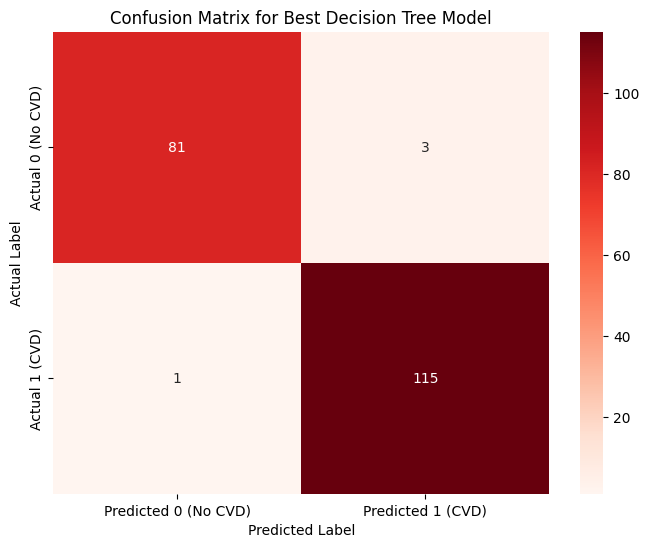

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

# 1. Define X (Features) and y (Target)
# We drop 'patientid' and the target column itself.
X = df.drop(['patientid', 'target'], axis=1)
y = df['target']

# 2. Split Data
# Split the data into training (80%) and testing (20%) sets.
# Decision Trees do not require scaling, so we use the raw X data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Define Decision Tree Model and Parameter Grid
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning (GridSearch)
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],  # Max depth of the tree (None means unlimited)
    'min_samples_split': [2, 5, 10],   # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Min samples required to be at a leaf node
    'criterion': ['gini', 'entropy']   # Split quality measure
}

# 4. Grid Search for Hyperparameter Tuning
# n_jobs=1 is used for compatibility across different environments.
grid_search_dt = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid_dt,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

# Fit the GridSearch on the training data
grid_search_dt.fit(X_train, y_train)

# Get the best estimator and parameters
best_dt = grid_search_dt.best_estimator_
best_score_dt = grid_search_dt.best_score_
best_params_dt = grid_search_dt.best_params_

# 5. Evaluation on Test Set
# Predict using the best model
y_pred_dt = best_dt.predict(X_test)

# Calculate metrics
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print results
print(f"\n--- Decision Tree Hyperparameter Tuning Results ---")
print(f"Best Cross-Validation Accuracy: {best_score_dt:.4f}")
print(f"Best Parameters: {best_params_dt}")
print(f"\n--- Decision Tree Test Set Evaluation ---")
print(f"Test Accuracy: {test_accuracy_dt:.4f}")
print(f"\nClassification Report:\n{report_dt}")
print(f"\nConfusion Matrix:\n{conf_matrix_dt}")

# 6. Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_dt,
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=['Predicted 0 (No CVD)', 'Predicted 1 (CVD)'],
    yticklabels=['Actual 0 (No CVD)', 'Actual 1 (CVD)']
)
plt.title('Confusion Matrix for Best Decision Tree Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_dt.png')
plt.show()